# Introduction to NetworkX

In [3]:
from matplotlib import pyplot as plt
import networkx as nx

Before we begin, we must first have a set of relationships that we wish to graph. Let's use a simple toy example, such as the five relationships below. Each person in these relationships will function as a single node in our graph. We will want to map these relationships by drawing edges between each individual's node.

In [4]:
rels = [
    
    ["Fred", "George"],
    ["Harry", "Rita"],
    ["Fred", "Ginny"],
    ["Tom", "Ginny"],
    ["Harry", "Ginny"]
    
]

In order to begin working with this data in NetworkX, we need to first populate a NetworkX `Graph` class. It is Pythonic to call this variable `G`.

In [5]:
G = nx.Graph()

Once created, we can populate the graph with relationships in a loop. We will want to use the `.add_edge()` method from the `Graph` class. This will take two mandatory arguments: 1) the source node and 2) the destination node. The source and the destination are important in certain circumstances when force is applied in a graph. This controls how the map is displayed visually.

In [6]:
for rel in rels:
    source, dest = rel
    G.add_edge(source, dest)

With all our edges add into the Graph, we can now plot it with Matplotlib. We will use the `draw_networkx()` function to create a plot in memory. This will take one argument, the graph of nodes we wish to visualize. Next, we will use `plt.show()` to display the map. Since we are working within a Jupyter Notebook, this will be displayed as an output.

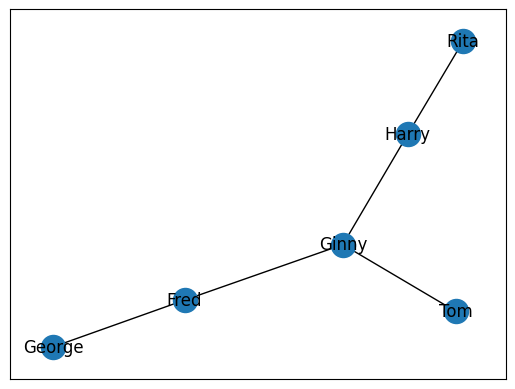

In [7]:
nx.draw_networkx(G)
plt.show()

## Adding all Edges at Once

Sometimes, you will not want to add each edge individually. In these circumstances, we can leverage the `add_edges_from()` method to add a list of edges all at once. This method will expect a list of relationships.

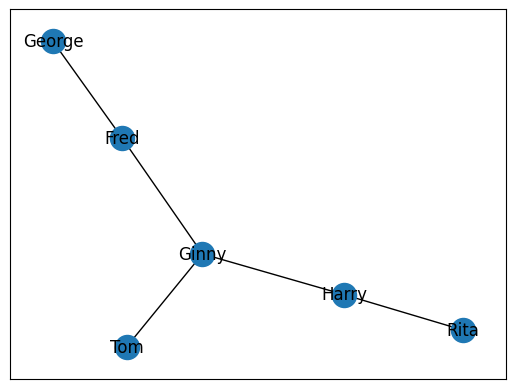

In [8]:
G = nx.Graph()
G.add_edges_from(rels)
nx.draw_networkx(G)
plt.show()

## Asymmetrical Networks

The above examples are all cases of `symmetrical` networks. This is where each node has an equal attraction to the other. The best example of this is with colleagues. If Ginny is a colleague with Harry, then Harry is a colleague with Ginny. Not all relationships work in this manner. Some relationships are `asymmetrical`. This is where one person has a unique relationship with another that cannot be the same in reverse. A good example of this is with parents and children. If Fred is the father of George, then George cannot possibly be the father of Fred.

NetworkX affords us the ability to draw these types of relationships with a different graph class called a `DiGraph`. We can use the precise same code as above, but rather than using `.nx.Graph()`, we will use `nx.DiGraph()`.

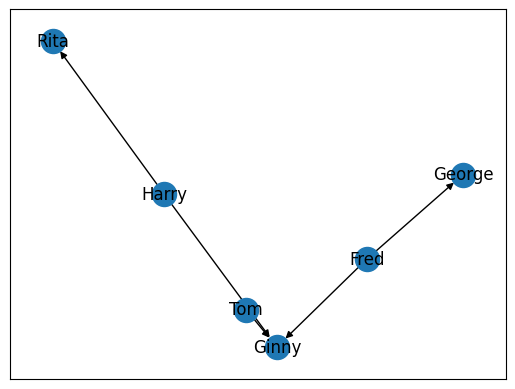

In [9]:
G = nx.DiGraph()
G.add_edges_from(rels)
nx.draw_networkx(G)
plt.show()

Note the salient change in our graph, specifically the arrows that point towards specific nodes. These arrows in a graph indicate the direction, or **force**, between two nodes in a graph. In the graph above, for example, we can see that Harry has a different relationship to Rita than Rita does with Harry.

## Calculating Shortest Distance

The above example is rather simple. Let's create a more complex graph with a few more relationships.

In [14]:
rels = [
    
    ["Fred", "George"],
    ["Harry", "Rita"],
    ["Fred", "Ginny"],
    ["Tom", "Ginny"],
    ["Harry", "Ginny"],
    ["Harry", "George"],
    ["Frank", "Ginny"],
    ["Marge", "Rita"],
    ["Fred", "Rita"]
    
]

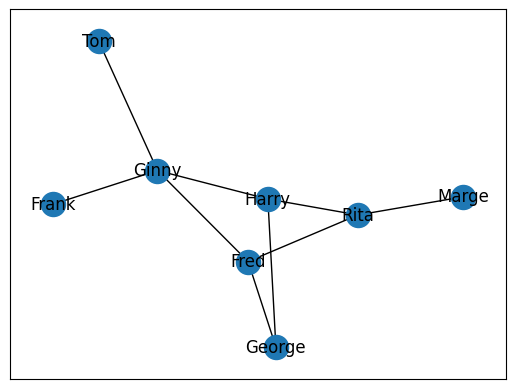

In [15]:
G = nx.Graph()
G.add_edges_from(rels)
nx.draw_networkx(G)
plt.show()

A common problem in graph theory is calculating the shortest distance to individuals. A good way to think about this is with the classic game `Seven Degrees of Kevin Bacon`. If we wanted to know the shortest distance between Fred and Rita, we could realistically look at the graph above and figure that out. But what if we had thousands of nodes? What about millions? These are real-world problems that cannot be solved practically by simple human observation. NetworkX preserves the network as a graph that it can walk to easily identify the shortest path between two nodes at any given point. To calculate this, we cna use `nx.shortest_path()`. This will take three arguments, the graph in which the nodes are found and the source node and target node. The result will be a list of the source node, followed by all **brokers** or intermediaries between the source and target node. These brokers will be followed by the target node.

In [16]:
nx.shortest_path(G, 'Fred', 'Marge')

['Fred', 'Rita', 'Marge']

## Calculating Connections

Another common task in graph analysis is understanding the **degree**, or number of connections, a node as at any given moment. This allows us to understand the role an individual plays within a network. Nodes with higher degree values often indicate a higher degree of importance in the data, though this is not always the case. In humanities-based inquiry, we frequently work with imperfect or incomplete data due to losses in the historical record. It is important, therefore, to understand a degree value as a reflection of extant data, not a reflection of certain importance.

We can calculate a node's degree value with `nx.degree()` which will take two arguments, the graph in which the node is found and the node for whom we seek a degree value.

In [19]:
nx.degree(G, "Fred")

3

## Identifying Major Actors in a Network

Another way to understand a specific node's role in a network, is to calculate a node's **centrality**, or degree of focus, in a network. We can calculate and grab the centrality of all nodes in our graph with `nx.degree_centrality()`. This will take a single argument, our graph. It will return a dictionary whose keys are each node and whose values are each node's centrality score. The higher the number, the more significant role that particular node plays in the graph.

In [27]:
centrality = nx.degree_centrality(G)
centrality

{'Fred': 0.42857142857142855,
 'George': 0.2857142857142857,
 'Harry': 0.42857142857142855,
 'Rita': 0.42857142857142855,
 'Ginny': 0.5714285714285714,
 'Tom': 0.14285714285714285,
 'Frank': 0.14285714285714285,
 'Marge': 0.14285714285714285}

## Limitations of Matplotlib and NetworkX

While NetworkX is quite useful for creating the data necessary to draw quick and (with practice) quality graphs via Matplotlib, this is largely suited to smaller networks. Often, when we are working with larger datasets of networks it will be important to visualize those networks more dynamically, where users can zoom in, zoom out, and select certain nodes. Most of these types of graphs are designed and implemented in JavaScript.

The graphs designed in JavaScript have the advantage of being able to be opened in any browser and distributed across the web or embedded in any website. Fortunately, the Python library PyVis allows us to produce JavaScript-based graphs with Python code.